# 3 Final comparison and conclusions

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error
from helpers import *

In [6]:
# load previosly saved prediction metrics
results = pd.read_csv('./results/final_results.csv', index_col=0).set_index('Model')
results

,precision_score,recall_score,f1_score,accuracy_score,AUROC
Model,,,,,
LSTM AutoEncoder,0.992,0.508197,0.672087,0.516,0.516
Stacked LSTM AutoEncoder,0.984,0.506173,0.668478,0.512,0.512
CNN LSTM AutoEncoder,0.984,0.506173,0.668478,0.512,0.512
Bidirectional LSTM AutoEncoder,0.984,0.506173,0.668478,0.512,0.512
Bidirectional LSTM AutoEncoder,0.984,0.504098,0.666667,0.508,0.508


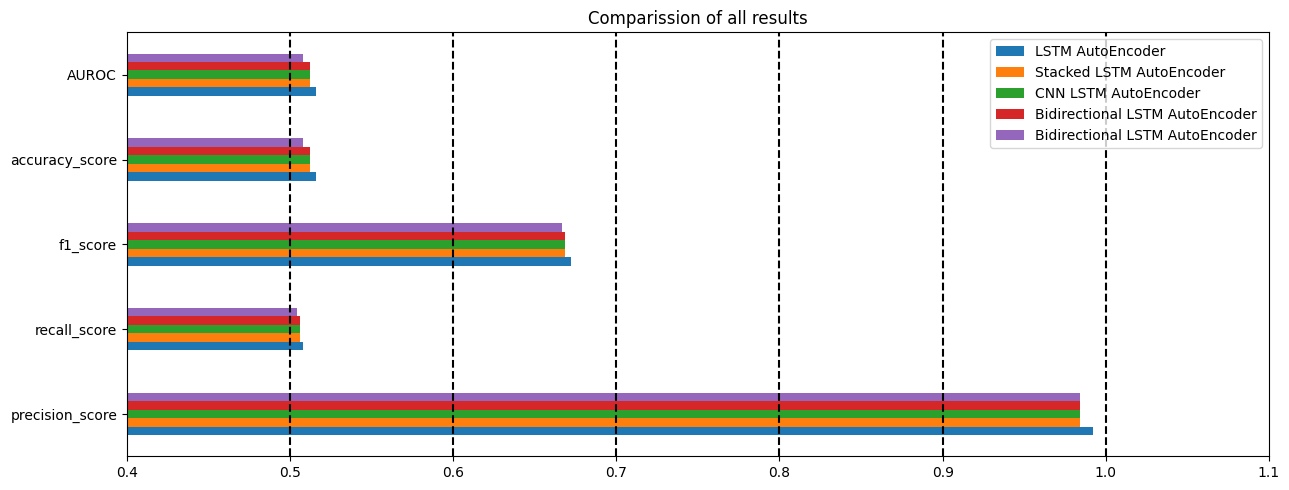

In [7]:
# plt.savefig('final_results')
plot_results(results.T)

<b> Conclusions: </b>
- All AutoEncoders work very well in detecting anomalies in ecg
- Normal LSTM and Bidirectional LSTM AutoEncoders obtained the worst results in accuracy - below 96.0%
- Stacked LSTM, CNN LSTM and Inception LSTM AutoEncoders obtained the best results in accuracy - around 98%

In [23]:
# load previously saved test predictions
with open('./results/test_predictions.pickle', 'rb') as f:
    predictions = pickle.load(f)
    
# load previously saved test reconstructed sequences
with open('./results/test_sequences.pickle', 'rb') as f:
    sequences = pickle.load(f)
    
# load previously saved model names
with open('./results/models_name.pickle', 'rb') as f:
    model_names = pickle.load(f)

# extract type of AutoEncoders from models name list 
model_names = [' '.join(x.split(' ')[:-1]) for x in model_names]
print(model_names)

# load test set labels
test_set = pd.read_csv("./data_preprocessed/test_dataset.csv", index_col=0).values

# extract sequences and labels from test set
X_test, y_test = test_set[:, :-1], test_set[:, -1]
print(X_test.shape, y_test.shape)

['LSTM', 'Stacked LSTM', 'CNN LSTM', 'Bidirectional LSTM', 'Inception LSTM']
(250, 140) (250,)


### Compare true positive reconstructed sequences (normal heartbeats sequences classified as normal)

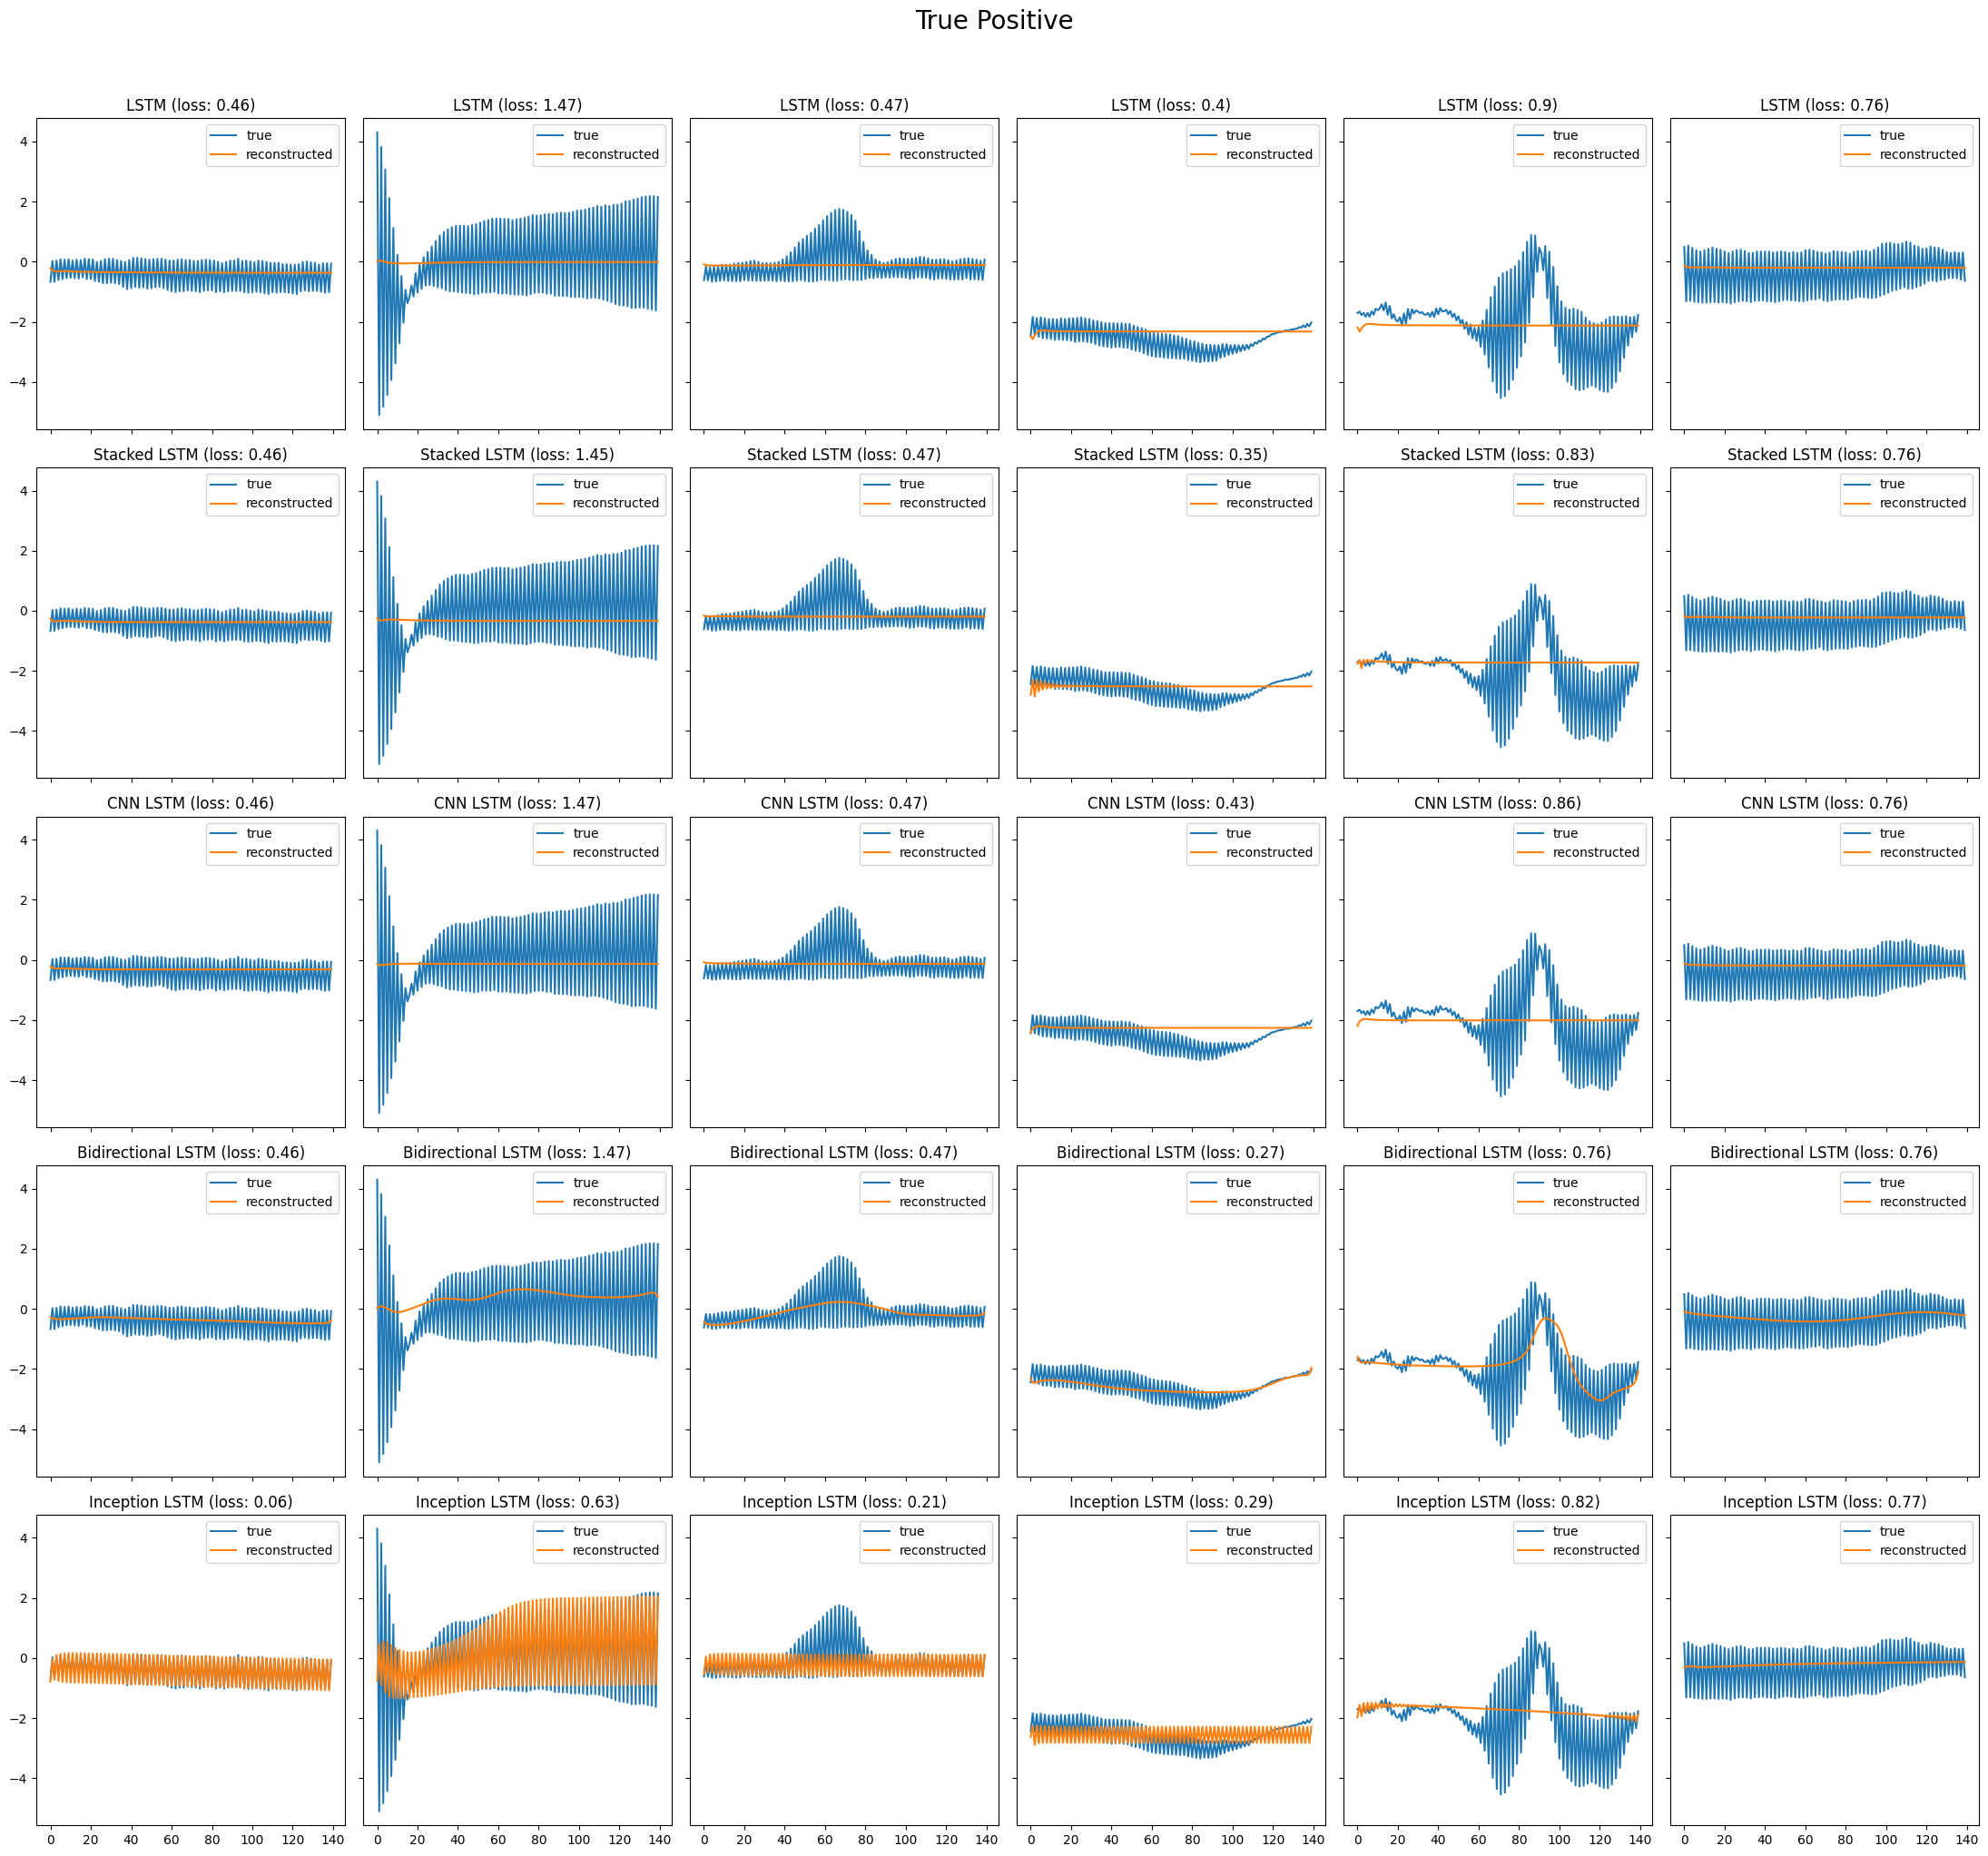

In [24]:
compare_reconstructions(X_test, 
                        y_test,
                        model_names,
                        sequences, 
                        predictions, 
                        title='True Positive', 
                        target1=1, 
                        target2=1, 
                        figsize=(22,20))

### Compare true neagative reconstructed sequences (anomaly heartbeats sequences classified as anomaly)

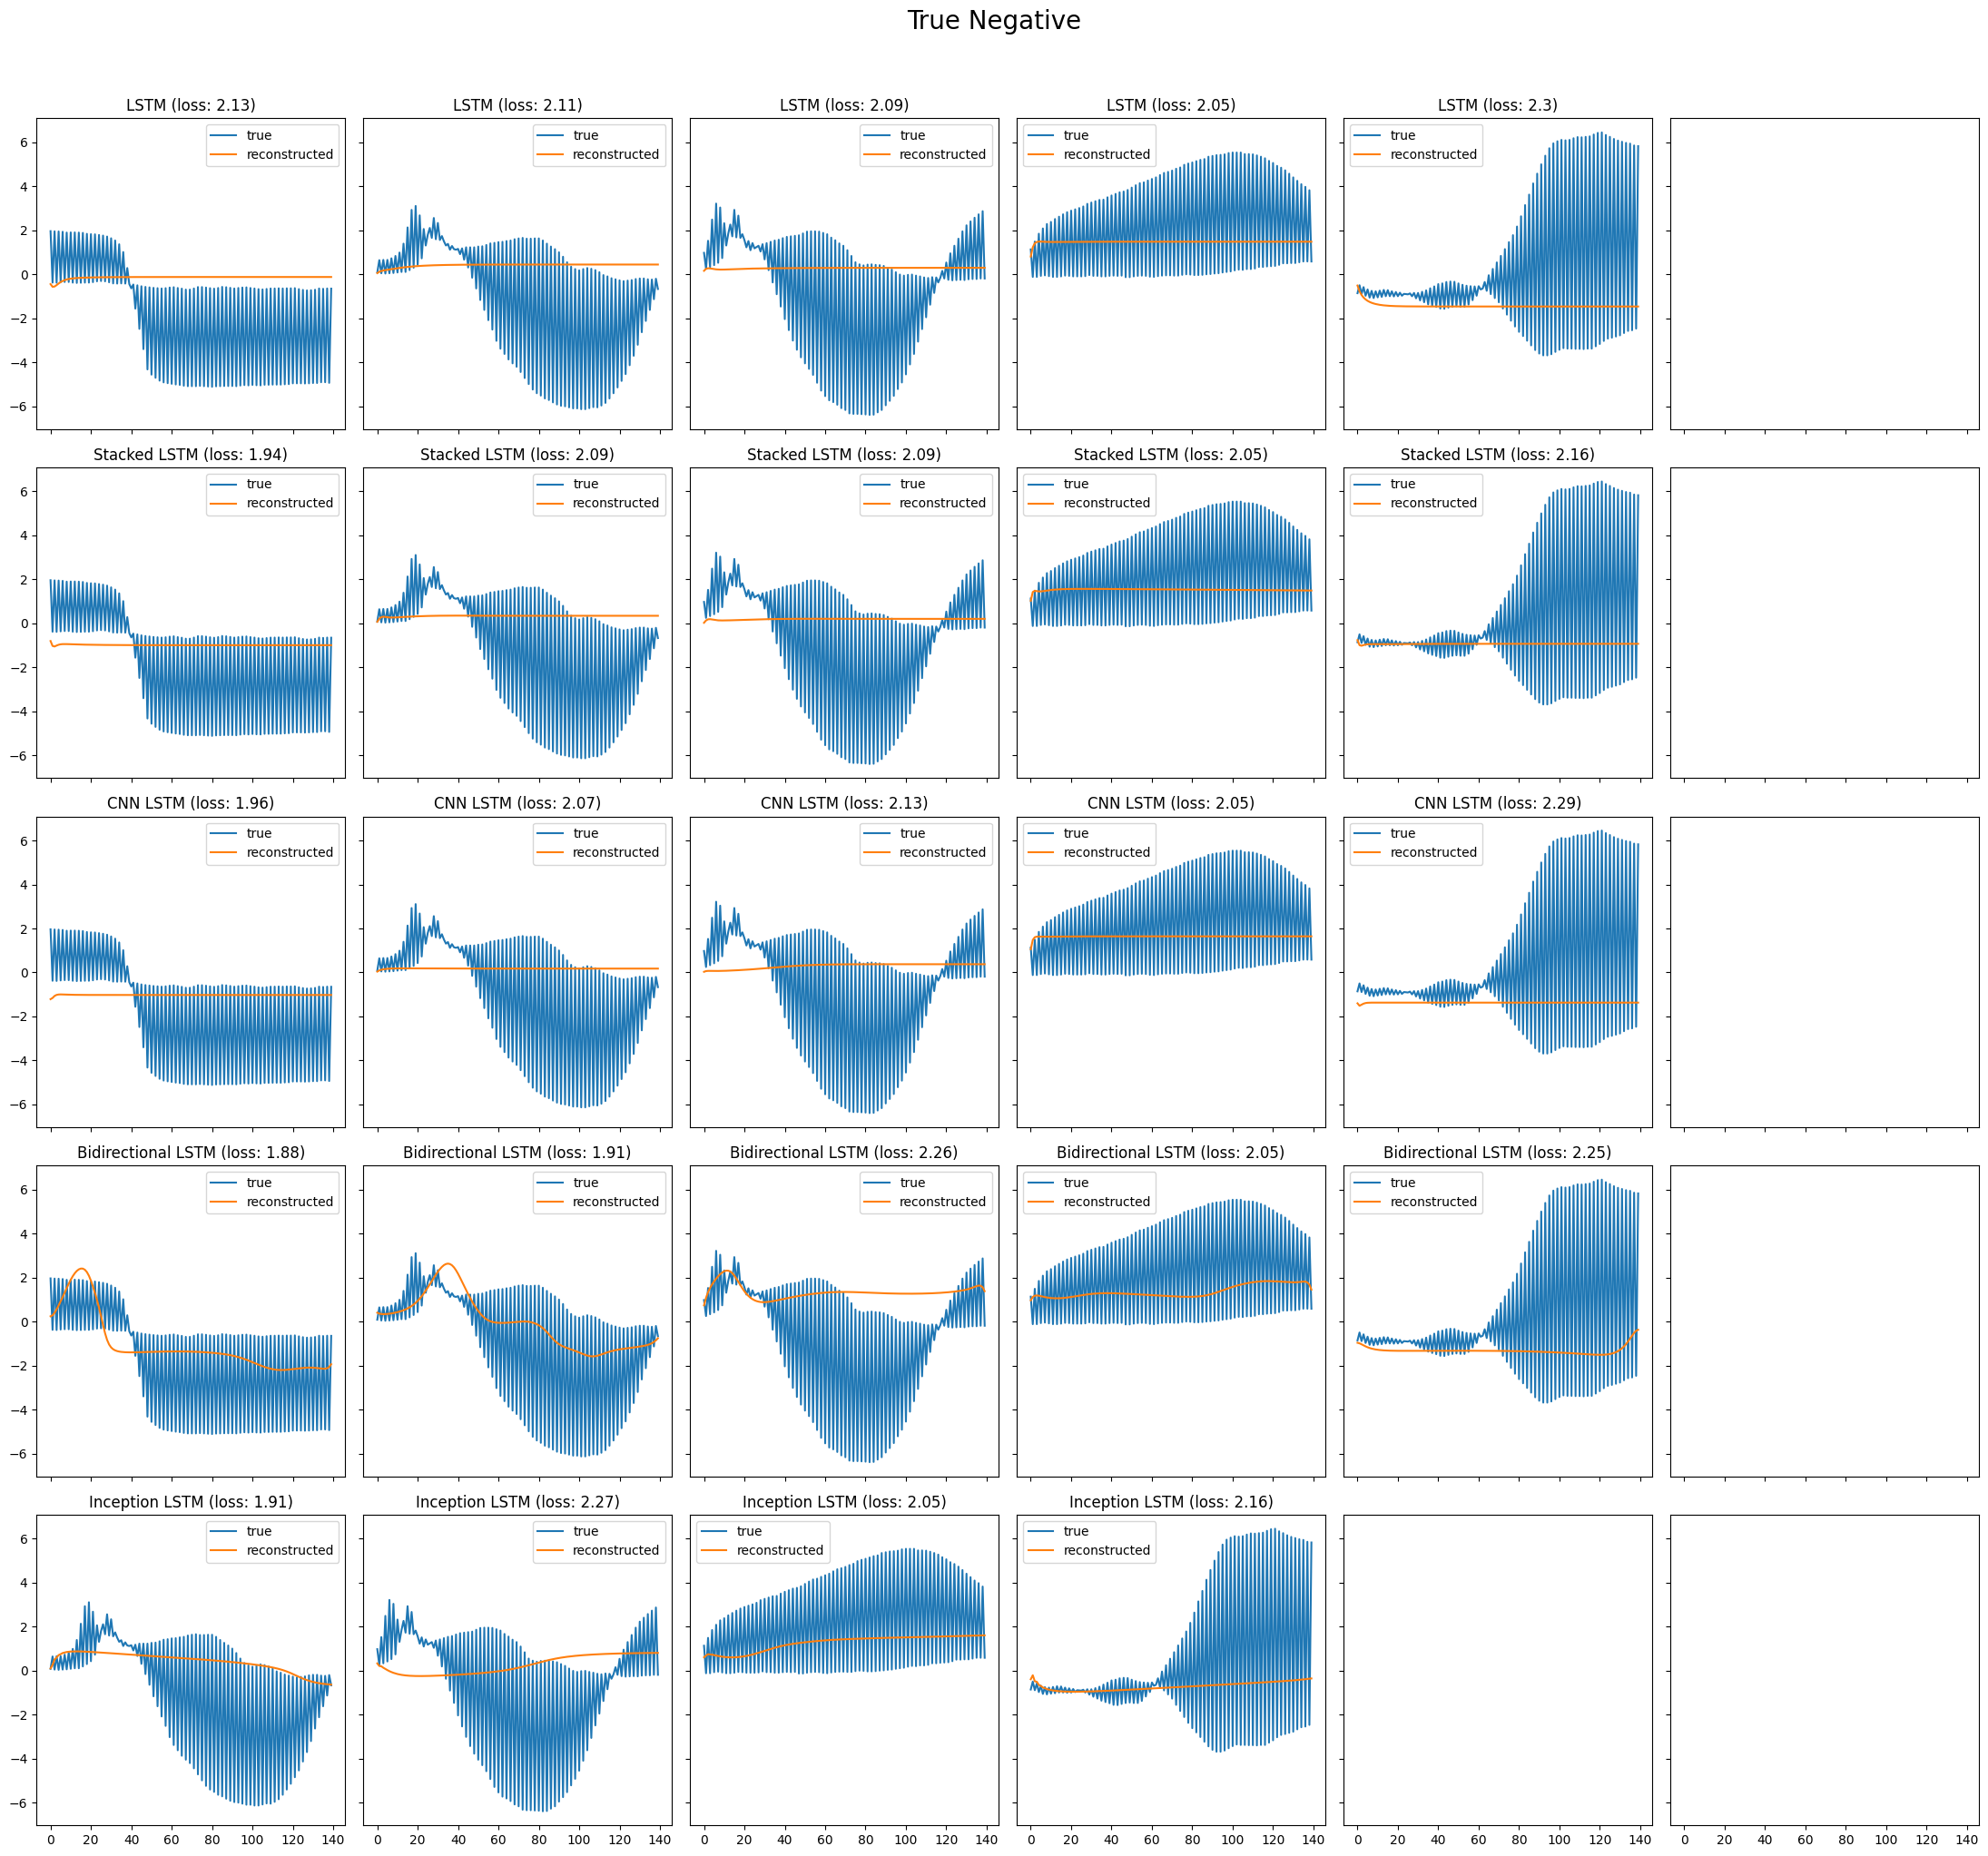

In [25]:
compare_reconstructions(X_test, 
                        y_test,
                        model_names,
                        sequences, 
                        predictions, 
                        title='True Negative', 
                        target1=0, 
                        target2=0, 
                        figsize=(22,20))

### Compare false positive reconstructed sequences (normal heartbeats sequences classified as anomalies)

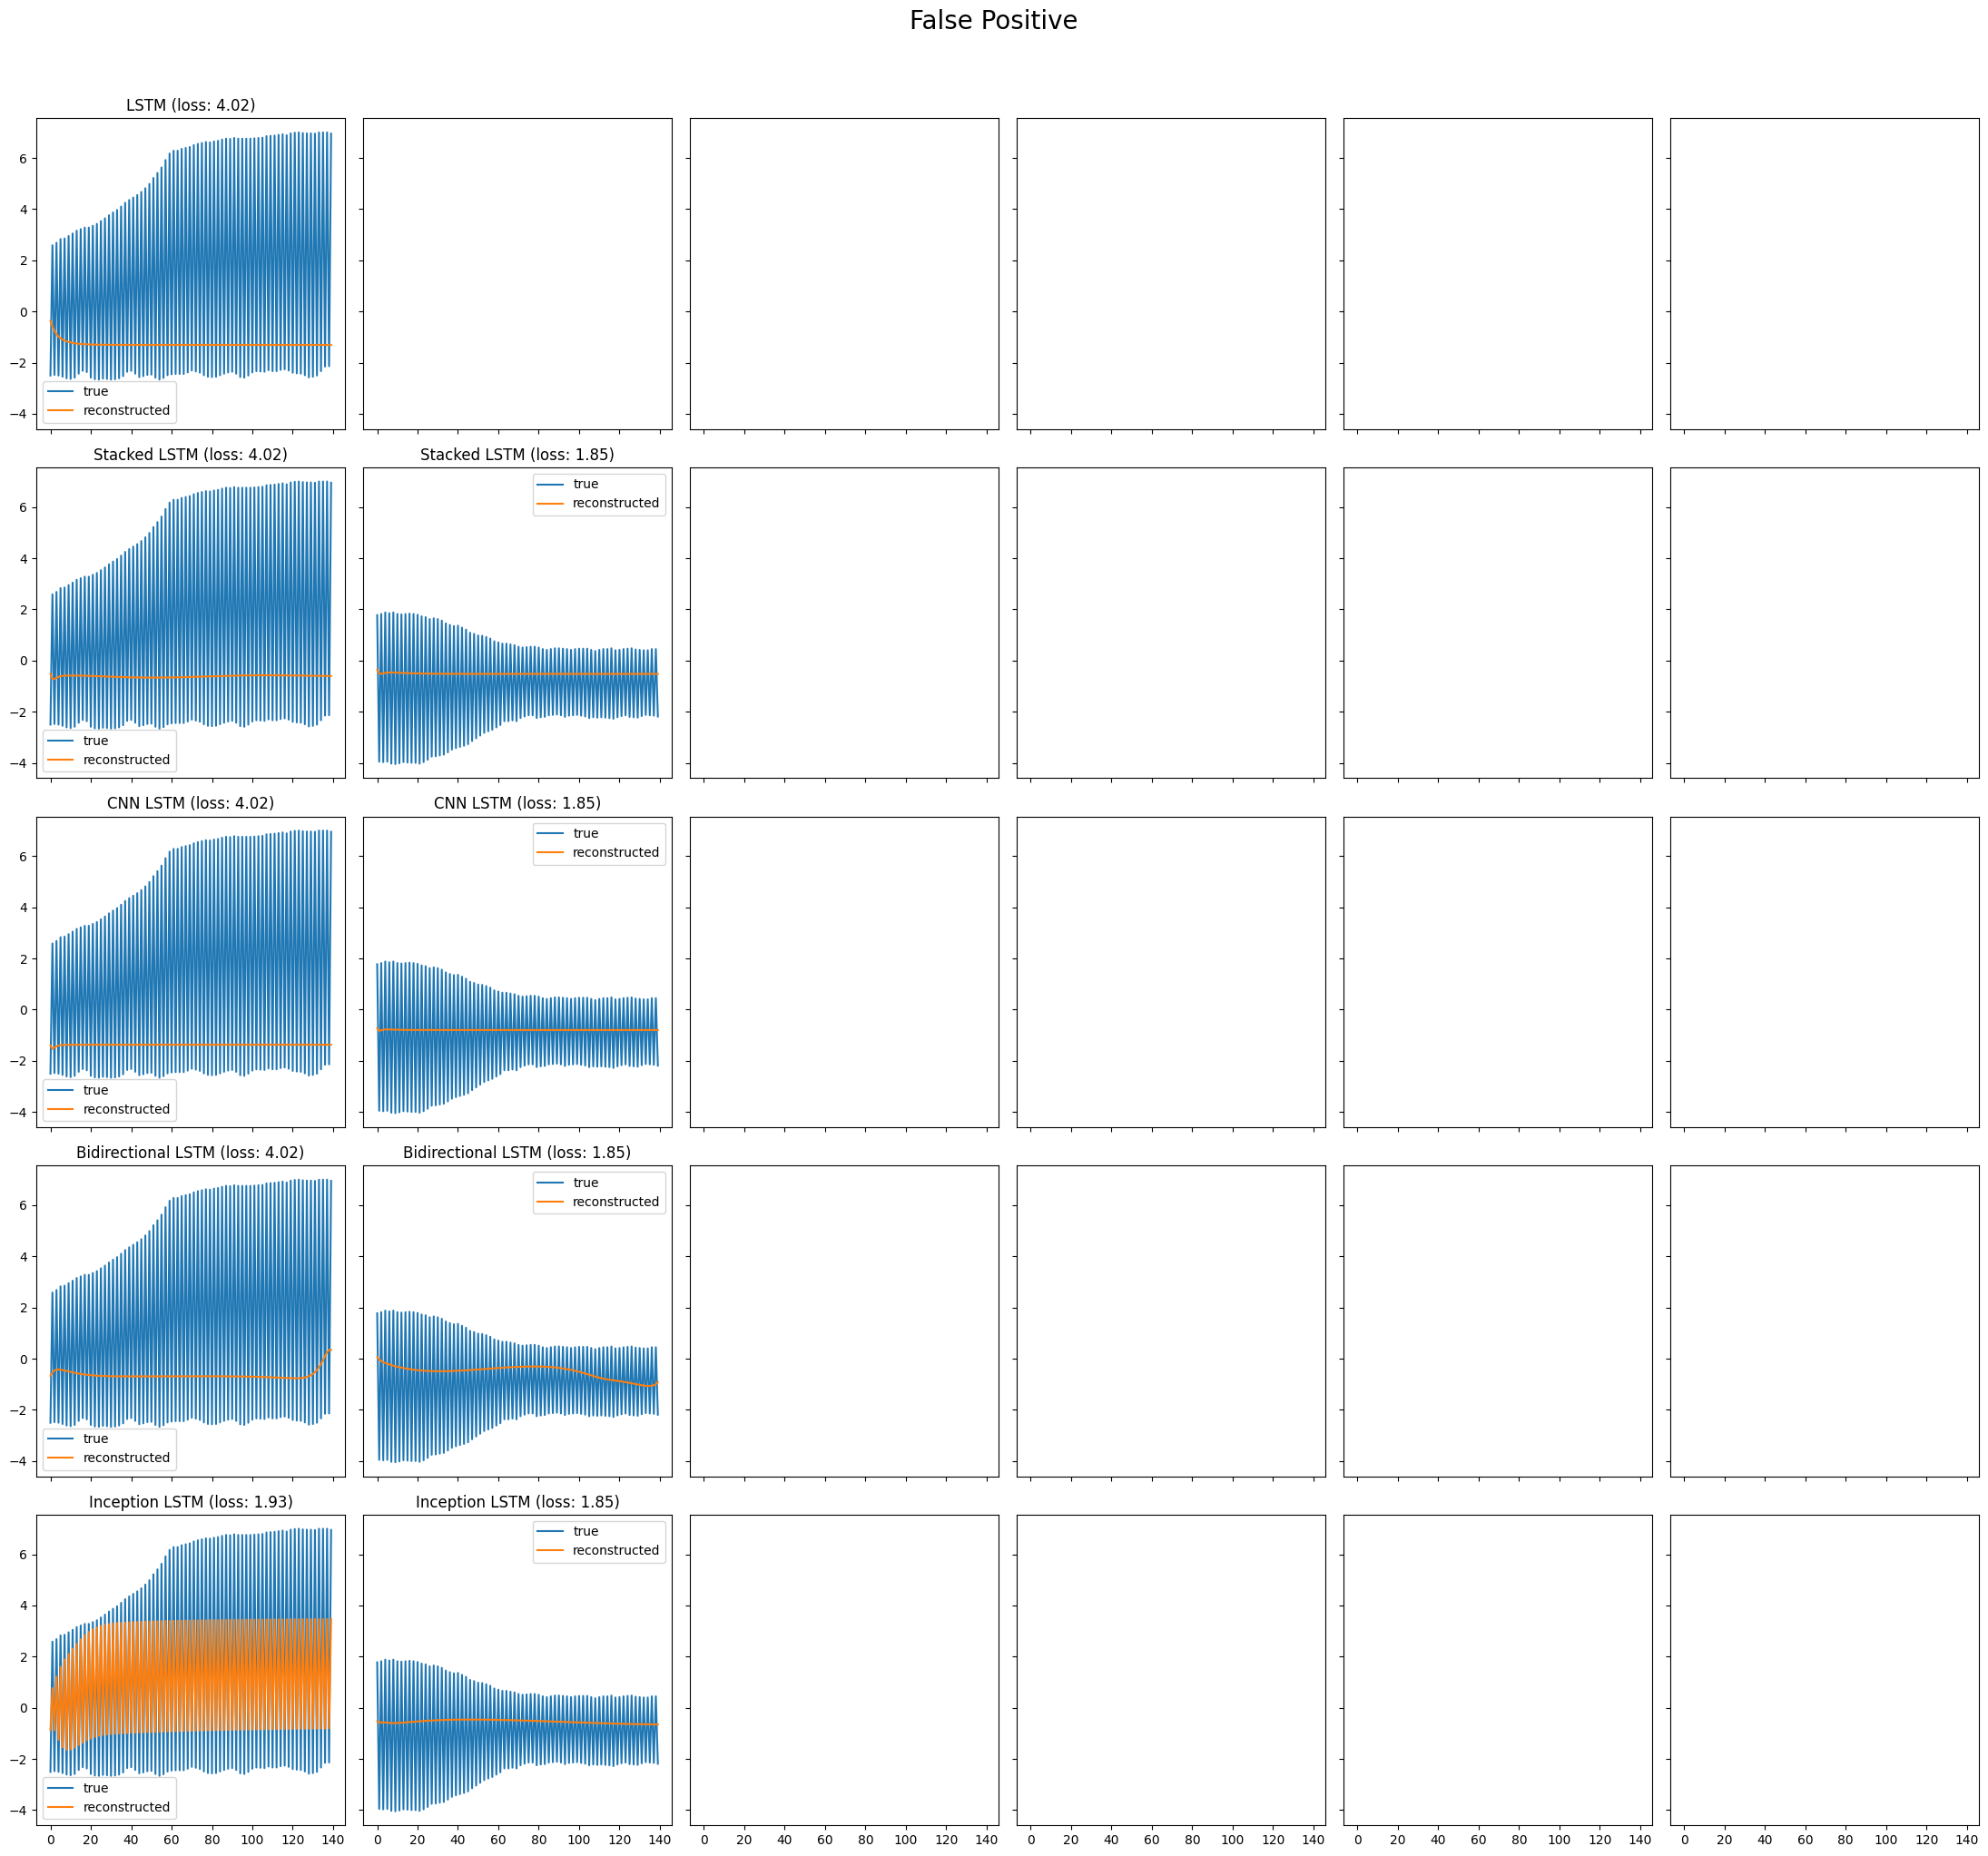

In [26]:
compare_reconstructions(X_test, 
                        y_test,
                        model_names,
                        sequences, 
                        predictions, 
                        title='False Positive', 
                        target1=1, 
                        target2=0, 
                        figsize=(22,20))

### Compare false negative reconstructed sequences (normal heartbeats sequences classified as anomalies)

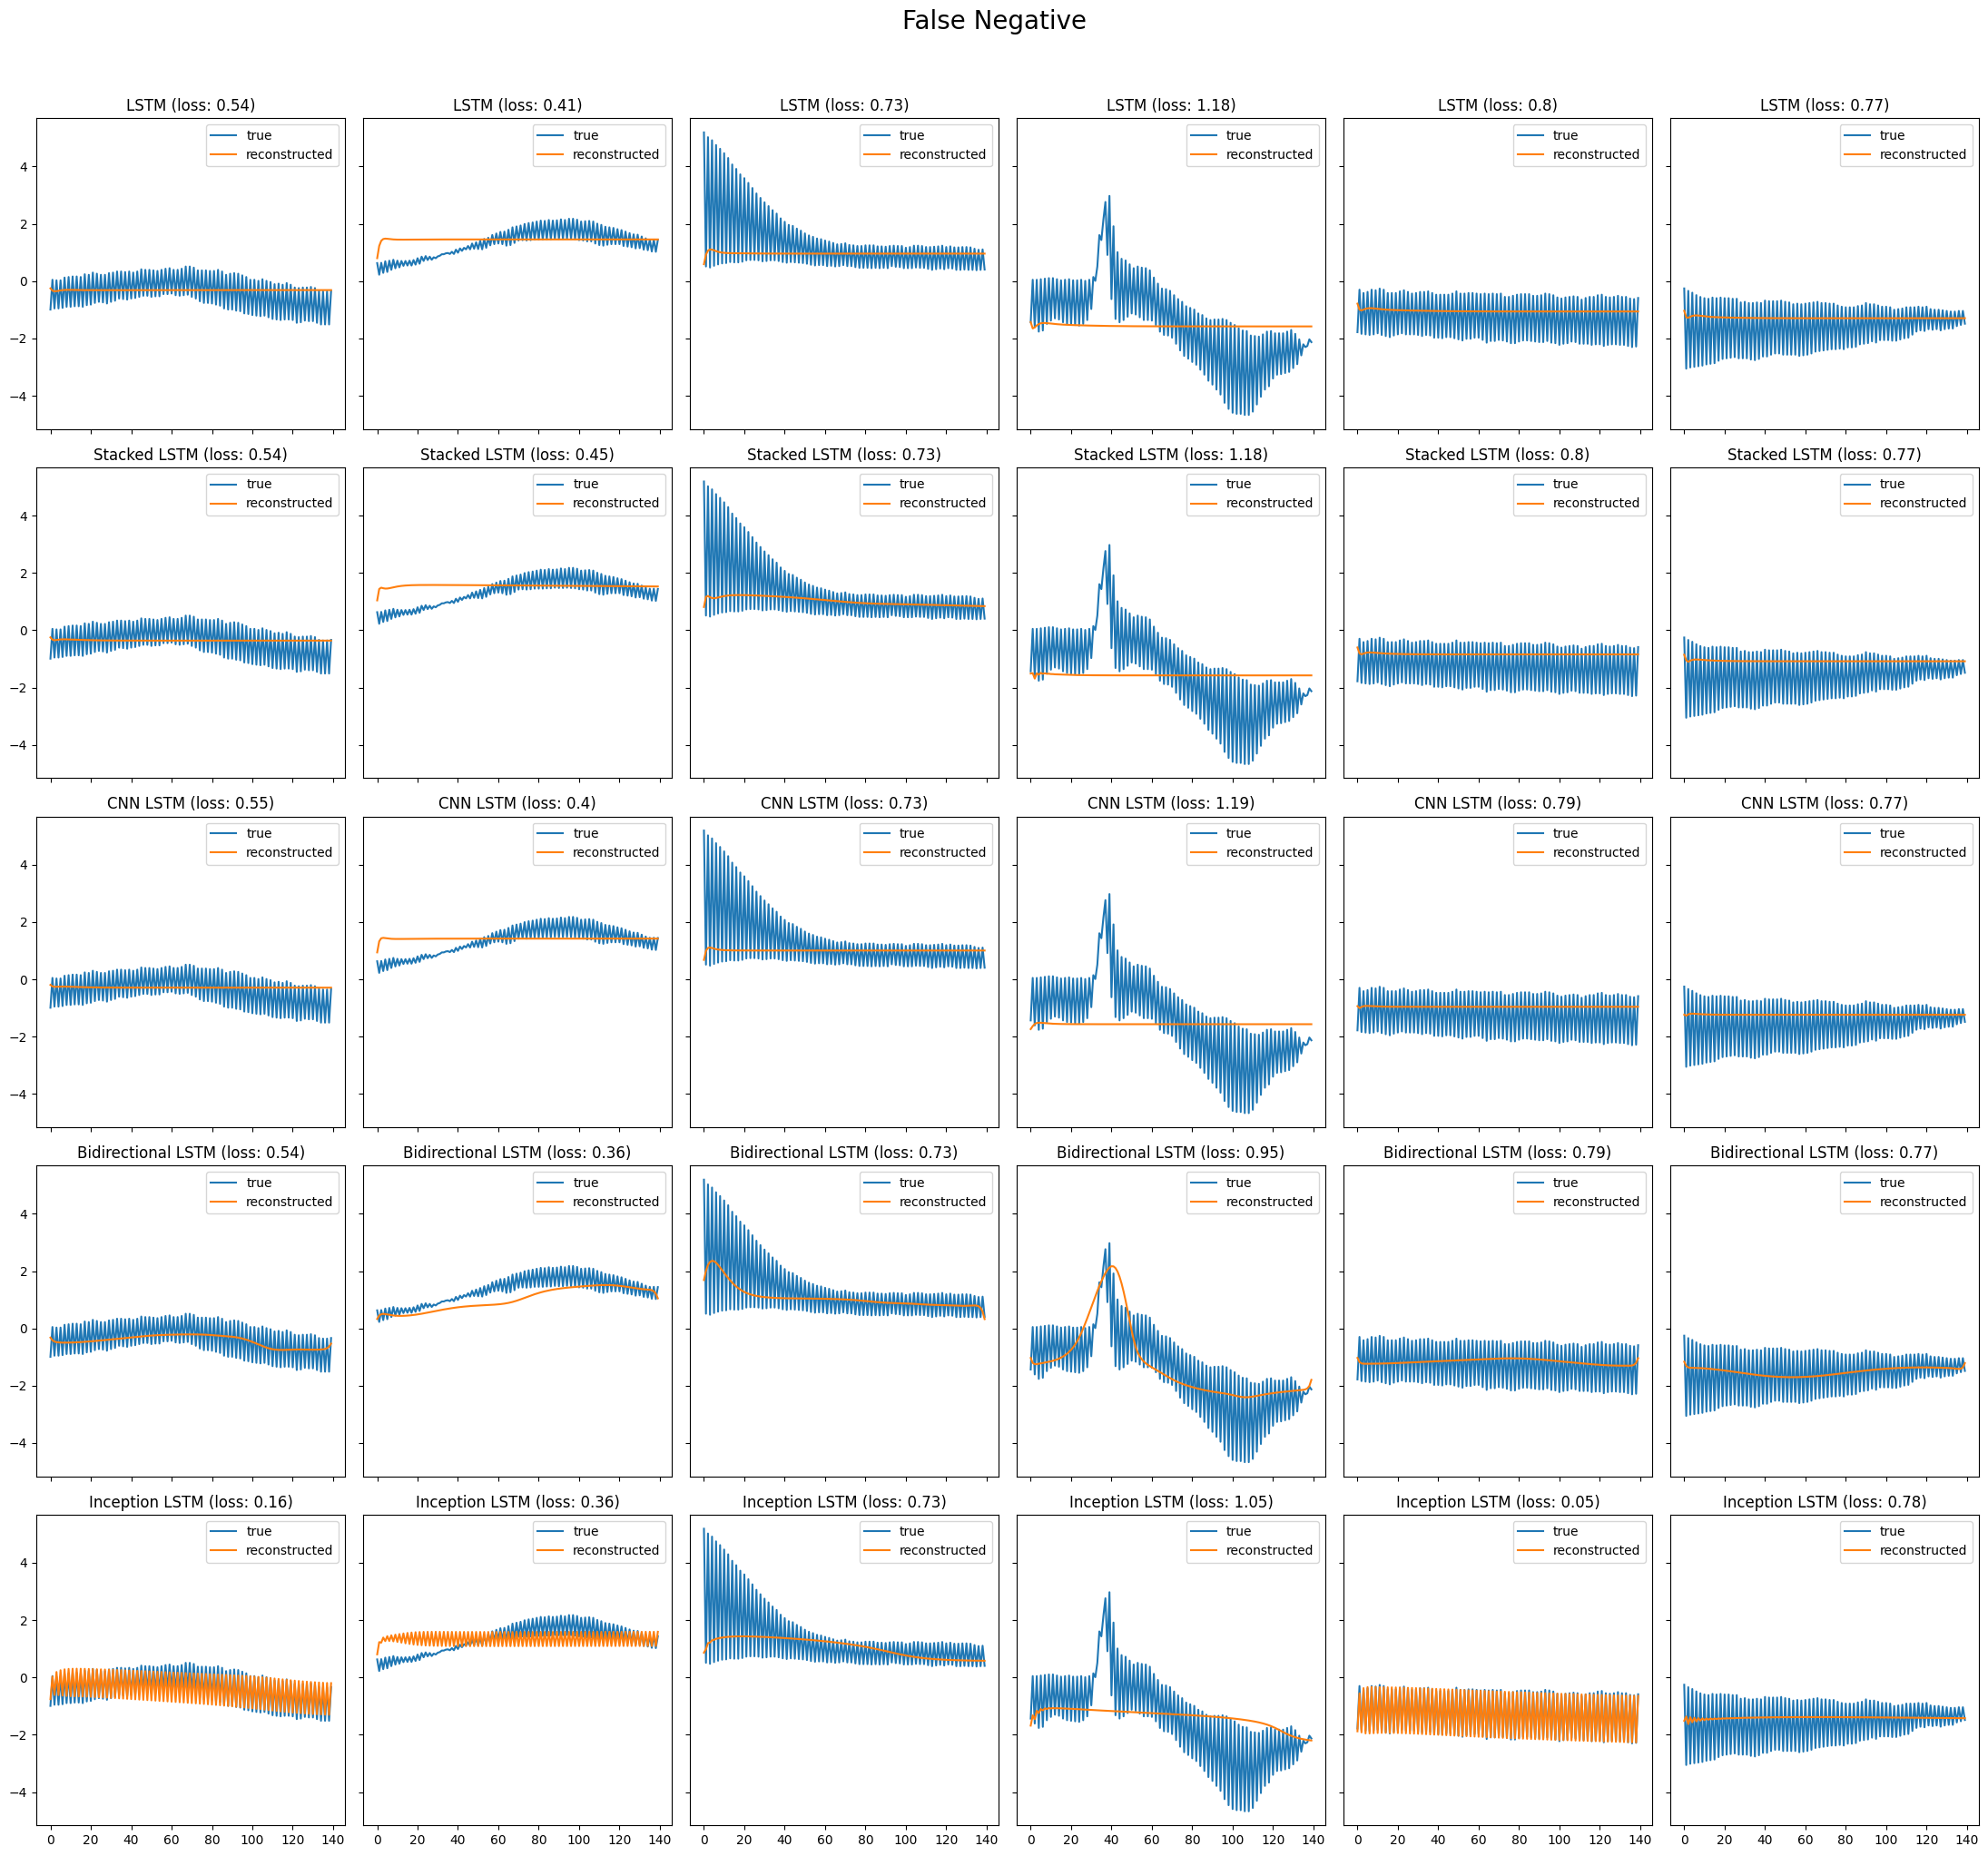

In [27]:
compare_reconstructions(X_test, 
                        y_test,
                        model_names,
                        sequences, 
                        predictions, 
                        title='False Negative', 
                        target1=0, 
                        target2=1, 
                        figsize=(22,20))